In [3]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import hypertools as hyp
from collections import Counter

'''Set plotting parameters'''
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
#read the final csv
df = pd.read_csv('nba.csv')

In [4]:
df

,Unnamed: 0,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,name
0,0,Kareem Abdul-Jabbar,C,LAL,82,NaN,38.3,10.2,16.9,0.604,0.0,0.0,0.000,10.2,16.9,0.604,0.604,4.4,5.8,0.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,Kareem Abdul-Jabbar
1,1,Tom Abernethy,PF,GSW,67,NaN,18.2,2.3,4.7,0.481,0.0,0.0,0.000,2.3,4.7,0.483,0.481,0.8,1.2,0.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,Tom Abernethy
2,2,Alvan Adams,C,PHO,75,NaN,28.9,6.2,11.7,0.531,0.0,0.0,0.000,6.2,11.6,0.533,0.531,2.5,3.1,0.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,Alvan Adams
3,3,Tiny Archibald,PG,BOS,80,80.0,35.8,4.8,9.9,0.482,0.1,0.2,0.222,4.7,9.7,0.488,0.485,4.5,5.4,0.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,Tiny Archibald
4,4,Dennis Awtrey,C,CHI,26,NaN,21.5,1.0,2.3,0.450,0.0,0.0,NaN,1.0,2.3,0.450,0.450,1.2,1.9,0.640,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,Dennis Awtrey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,524,Trae Young,PG,ATL,60,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,Trae Young
17127,525,Cody Zeller,C,CHO,58,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,Cody Zeller
17128,526,Tyler Zeller,C,SAS,2,0.0,2.0,0.5,2.0,0.250,0.0,0.0,NaN,0.5,2.0,0.250,0.250,0.0,0.0,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Tyler Zeller
17129,527,Ante Žižić,C,CLE,22,0.0,10.0,1.9,3.3,0.569,0.0,0.0,NaN,1.9,3.3,0.569,0.569,0.6,0.9,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,Ante Žižić


In [4]:
#drop name and unnamed column
df.pop('Unnamed: 0')
df.pop('name')

0        Kareem Abdul-Jabbar
1              Tom Abernethy
2                Alvan Adams
3             Tiny Archibald
4              Dennis Awtrey
                ...         
17126             Trae Young
17127            Cody Zeller
17128           Tyler Zeller
17129             Ante Žižić
17130            Ivica Zubac
Name: name, Length: 17131, dtype: object

In [5]:
#Choosing minutes per game over 15 and total games over 40
df= df[df['MP']>15]
df= df[df['G']>40]

In [6]:
df

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kareem Abdul-Jabbar,C,LAL,82,NaN,38.3,10.2,16.9,0.604,0.0,0.0,0.000,10.2,16.9,0.604,0.604,4.4,5.8,0.765,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,Tom Abernethy,PF,GSW,67,NaN,18.2,2.3,4.7,0.481,0.0,0.0,0.000,2.3,4.7,0.483,0.481,0.8,1.2,0.683,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,Alvan Adams,C,PHO,75,NaN,28.9,6.2,11.7,0.531,0.0,0.0,0.000,6.2,11.6,0.533,0.531,2.5,3.1,0.797,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,Tiny Archibald,PG,BOS,80,80.0,35.8,4.8,9.9,0.482,0.1,0.2,0.222,4.7,9.7,0.488,0.485,4.5,5.4,0.830,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
6,James Bailey,PF,SEA,67,NaN,10.8,1.8,4.0,0.450,0.0,0.0,NaN,1.8,4.0,0.450,0.450,1.0,1.5,0.673,1.1,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123,Delon Wright,PG,DAL,73,5.0,21.5,2.6,5.6,0.462,0.6,1.7,0.370,2.0,3.9,0.504,0.519,1.1,1.4,0.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9
17125,Thaddeus Young,PF,CHI,64,16.0,24.9,4.2,9.4,0.448,1.2,3.5,0.356,3.0,5.9,0.501,0.513,0.7,1.1,0.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3
17126,Trae Young,PG,ATL,60,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
17127,Cody Zeller,C,CHO,58,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1


In [7]:
#drop Nans
df=df.dropna(how='any')

In [8]:

df.isnull().values.any()

False

In [9]:
info = df.filter(items=['Player', 'Pos' , 'Tm','name'] )

In [10]:
df.head(1)

,Player,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,Tiny Archibald,PG,BOS,80,80.0,35.8,4.8,9.9,0.482,0.1,0.2,0.222,4.7,9.7,0.488,0.485,4.5,5.4,0.83,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1


In [10]:
#drop columns
df=df.drop(columns=['G','GS','Tm','MP','FG%','3P%','2P%','eFG%','FT%'])

In [12]:
df.head(1)


,Player,Pos,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,Tiny Archibald,PG,4.8,9.9,0.1,0.2,4.7,9.7,4.5,5.4,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1


In [11]:
#groupby avg stats
df_avg=df.groupby('Player', as_index=False).mean()

In [15]:
df_avg.duplicated().any()

False

In [18]:
#drop player column
df_prescale = df_avg.drop(['Player'],axis=1)

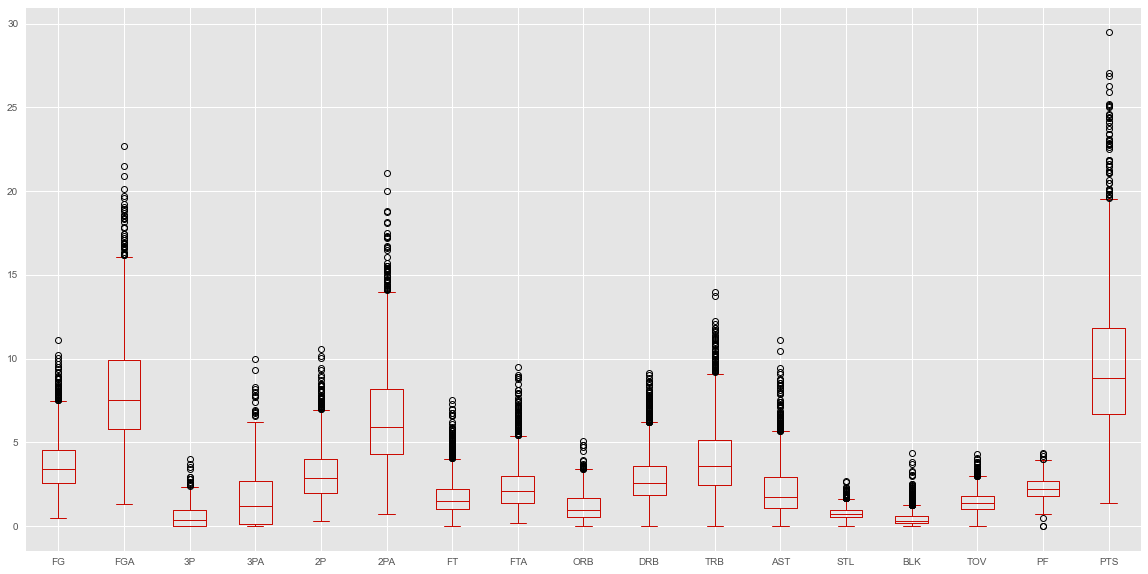

In [14]:
#box plot
df_prescale.plot(kind='box',figsize=(20,10),color='r')
None

In [15]:
df_prescale

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,3.512500,7.112500,0.100000,0.400000,3.412500,6.737500,2.418750,3.312500,2.568750,4.712500,7.281250,1.093750,0.787500,0.431250,1.112500,1.887500,9.556250
1,4.050000,9.300000,0.050000,0.400000,3.950000,8.850000,1.700000,2.200000,0.900000,1.200000,2.100000,2.150000,0.400000,0.150000,1.350000,1.900000,9.850000
2,2.400000,5.800000,0.800000,2.100000,1.500000,3.700000,0.500000,0.500000,0.300000,0.800000,1.100000,1.900000,0.300000,0.200000,0.700000,1.100000,6.000000
3,2.566667,6.633333,1.033333,3.200000,1.533333,3.433333,1.033333,1.333333,0.300000,1.366667,1.666667,2.566667,0.600000,0.066667,1.100000,1.133333,7.166667
4,3.928571,9.542857,1.400000,3.814286,2.528571,5.685714,1.642857,1.928571,0.414286,1.428571,1.828571,3.342857,0.628571,0.157143,1.728571,2.028571,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,2.100000,5.200000,0.600000,1.900000,1.500000,3.300000,1.300000,1.600000,0.700000,1.200000,1.900000,0.600000,0.400000,0.100000,0.800000,1.000000,6.000000
1815,4.000000,7.500000,0.000000,0.000000,4.000000,7.500000,2.000000,3.600000,3.400000,8.300000,11.700000,0.900000,0.600000,1.100000,2.100000,2.700000,10.100000
1816,2.150000,5.400000,0.900000,2.600000,1.200000,2.800000,1.500000,1.650000,0.250000,1.350000,1.550000,2.850000,0.450000,0.050000,1.450000,1.300000,6.700000
1817,4.314286,8.542857,0.442857,1.214286,3.828571,7.342857,3.771429,4.942857,0.771429,1.414286,2.200000,2.328571,1.271429,0.085714,1.942857,2.614286,12.885714


<AxesSubplot:>

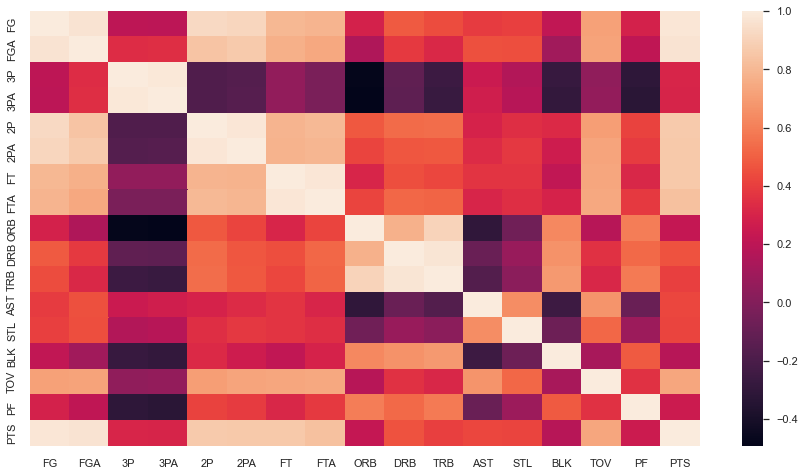

In [16]:
#corellation map
corr = df_avg.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr)

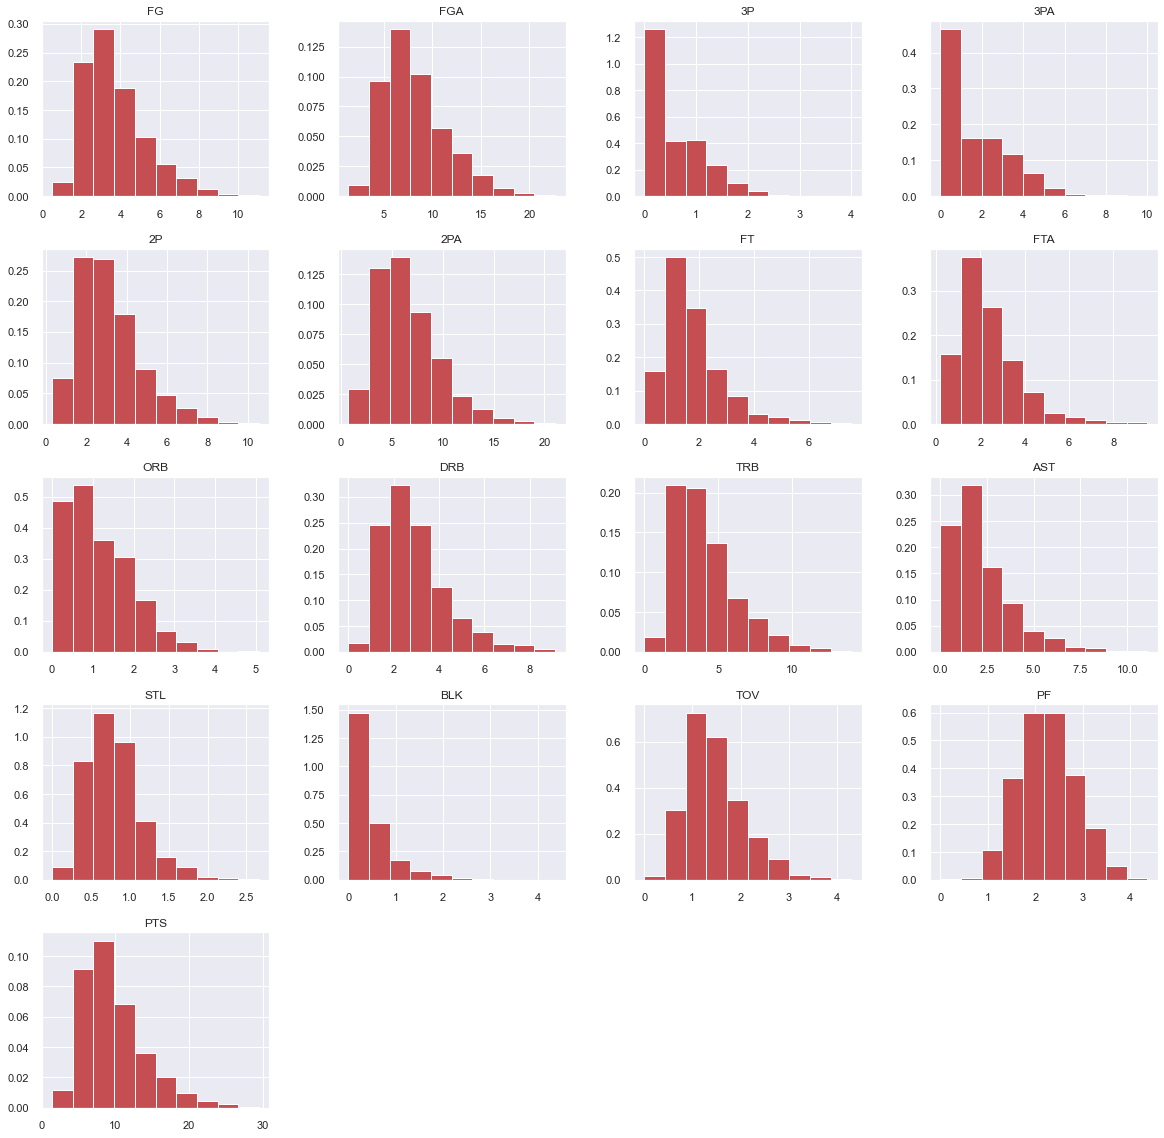

In [17]:
#histograms
hs1 = df_avg.hist(figsize=(20,20), density=True , color='r')

plt.show()

In [19]:
#scale our data using standardscaler
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_prescale)

'''scale numeric features now'''
X = ss.transform(df_prescale)

In [28]:
X

array([[-0.08926741, -0.27741723,  0.63088031, ..., -0.56274033,
        -0.61005217, -0.00383023],
       [ 0.25161863,  0.39596899, -0.32238887, ..., -0.1698702 ,
        -0.58983413,  0.06594574],
       [-0.79482222, -0.68144896, -0.86711413, ..., -1.2450937 ,
        -1.8837883 , -0.84856492],
       ...,
       [ 0.41923036,  0.1628949 ,  0.78262521, ...,  0.81082815,
         0.56548209,  0.78703486],
       [-0.35087762, -0.65066559,  1.16047431, ..., -0.14230037,
         1.13543809, -0.62686536],
       [-0.71026134, -1.04058828,  1.59625451, ..., -0.80397637,
         0.32671673, -0.74563298]])

In [20]:
'''generate the linkage matrix'''
Z = linkage(X, 'ward')

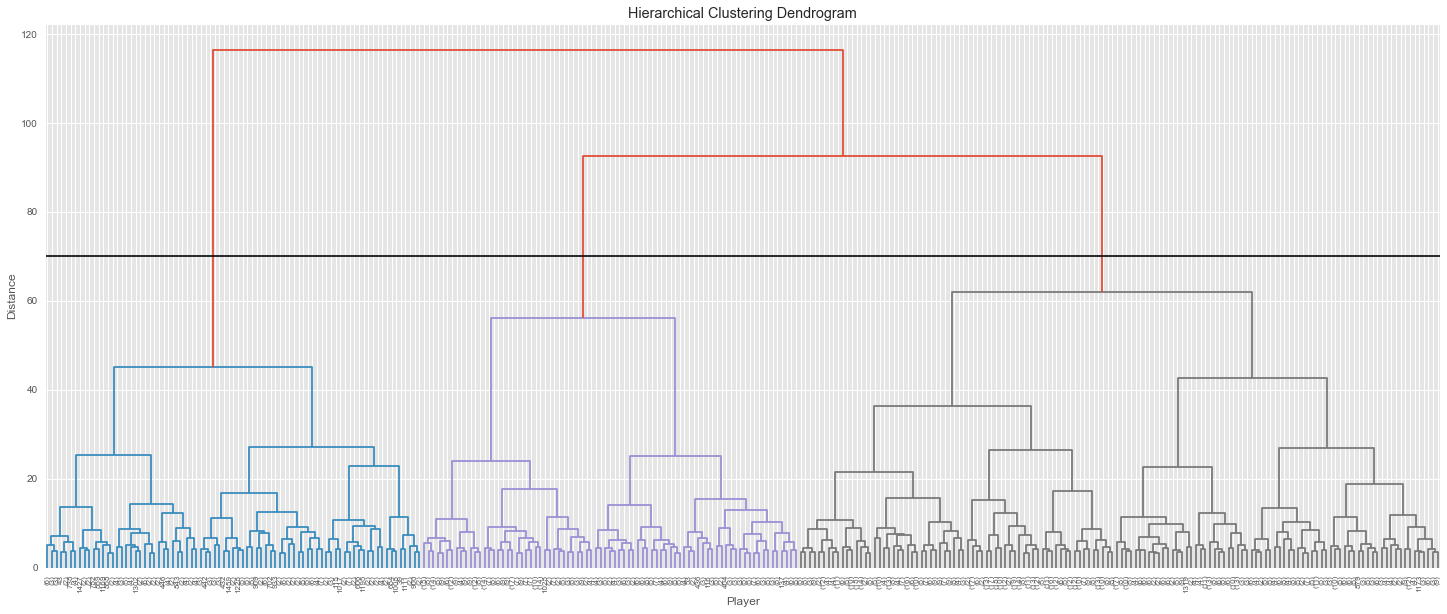

In [21]:
'''set cut-off'''
max_d = 70

'''plot the dendogram'''
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Player')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=300,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

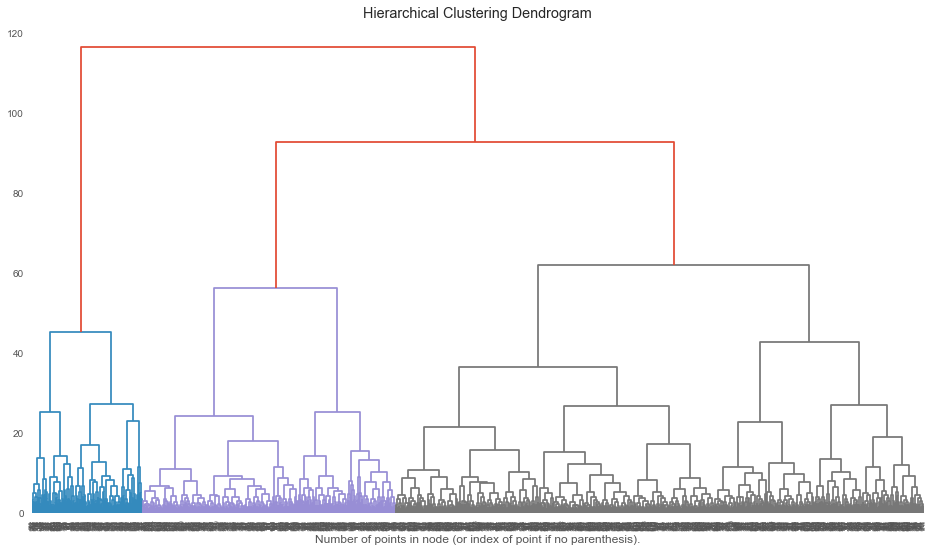

In [22]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [23]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_prescale)

array([1, 2, 4, ..., 4, 2, 4], dtype=int64)

In [24]:
print(cluster.labels_)

[1 2 4 ... 4 2 4]


In [25]:
y = cluster.labels_
y_df = pd.DataFrame(y)
y_df.rename({0: 'cluster'}, axis=1, inplace=True)
y_df

,cluster
0,1
1,2
2,4
3,2
4,3
...,...
1663,4
1664,1
1665,4
1666,2


In [26]:
cluster_df = pd.concat([df_avg,y_df],axis=1)

In [27]:
cluster_df

,Player,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,A.C. Green,3.512500,7.112500,0.100000,0.400000,3.412500,6.737500,2.418750,3.312500,2.568750,4.712500,7.281250,1.093750,0.787500,0.431250,1.112500,1.887500,9.556250,1
1,A.J. English,4.050000,9.300000,0.050000,0.400000,3.950000,8.850000,1.700000,2.200000,0.900000,1.200000,2.100000,2.150000,0.400000,0.150000,1.350000,1.900000,9.850000,2
2,A.J. Price,2.566667,6.633333,1.033333,3.200000,1.533333,3.433333,1.033333,1.333333,0.300000,1.366667,1.666667,2.566667,0.600000,0.066667,1.100000,1.133333,7.166667,4
3,Aaron Brooks,3.928571,9.542857,1.400000,3.814286,2.528571,5.685714,1.642857,1.928571,0.414286,1.428571,1.828571,3.342857,0.628571,0.157143,1.728571,2.028571,10.900000,2
4,Aaron Gordon,4.716667,10.550000,1.100000,3.366667,3.650000,7.166667,2.016667,2.866667,1.566667,4.783333,6.366667,2.316667,0.750000,0.633333,1.366667,2.016667,12.516667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Óscar Torres,2.100000,5.200000,0.600000,1.900000,1.500000,3.300000,1.300000,1.600000,0.700000,1.200000,1.900000,0.600000,0.400000,0.100000,0.800000,1.000000,6.000000,4
1664,Ömer Aşık,4.000000,7.500000,0.000000,0.000000,4.000000,7.500000,2.000000,3.600000,3.400000,8.300000,11.700000,0.900000,0.600000,1.100000,2.100000,2.700000,10.100000,1
1665,Šarūnas Jasikevičius,2.150000,5.400000,0.900000,2.600000,1.200000,2.800000,1.500000,1.650000,0.250000,1.350000,1.550000,2.850000,0.450000,0.050000,1.450000,1.300000,6.700000,4
1666,Šarūnas Marčiulionis,4.050000,8.150000,0.500000,1.333333,3.500000,6.833333,3.500000,4.583333,0.683333,1.333333,2.033333,2.133333,1.200000,0.083333,1.850000,2.533333,12.133333,2


In [32]:
cluster1=cluster_df.loc[cluster_df['cluster'] == 0]
cluster2=cluster_df.loc[cluster_df['cluster'] == 1]
cluster3=cluster_df.loc[cluster_df['cluster'] == 2]
cluster4=cluster_df.loc[cluster_df['cluster'] == 3]
cluster5=cluster_df.loc[cluster_df['cluster'] == 4]
cluster6=cluster_df.loc[cluster_df['cluster'] == 5]

In [39]:
jordan = cluster_df.loc[cluster_df['Player'] == 'Michael Jordan']
giannis = cluster_df.loc[cluster_df['Player'] == 'Giannis Antetokounmpo']
harden = cluster_df.loc[cluster_df['Player'] == 'James Harden']
durant = cluster_df.loc[cluster_df['Player'] == 'Kevin Durant']
curry = cluster_df.loc[cluster_df['Player'] == 'Stephen Curry']
rod  = cluster_df.loc[cluster_df['Player'] == 'Dennis Rodman']
Howard = cluster_df.loc[cluster_df['Player'] == 'Dwight Howard']
Malone = cluster_df.loc[cluster_df['Player'] == 'Karl Malone']
Hakeem= cluster_df.loc[cluster_df['Player'] == 'Hakeem Olajuwon']
kyle=cluster_df.loc[cluster_df['Player'] == 'Kyle Korver']
Klay=cluster_df.loc[cluster_df['Player'] == 'Klay Thompson']
damian=cluster_df.loc[cluster_df['Player'] == 'Damian Lillard']
ray=cluster_df.loc[cluster_df['Player'] == 'Ray Allen']

In [40]:
ray


,Player,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
1282,Ray Allen,6.717647,14.835294,2.347059,5.888235,4.352941,8.952941,3.441176,3.835294,0.905882,3.135294,4.052941,3.423529,1.141176,0.188235,2.111765,2.158824,19.205882,0


In [29]:
cluster_df.groupby('cluster').size()

cluster
0    105
1    310
2    384
3    288
4    508
5     73
dtype: int64

In [30]:
'''check average values per cluster, groupby'''
pad_group_df = cluster_df
pad_group_df = pad_group_df.groupby('cluster').mean()

'''remove ID column'''
#pad_group_df = pad_group_df.drop(columns = ["ID"])

'''remove index column'''
#pad_group_df = pad_group_df.drop(columns = ["index"])

'''flatten 0'''
pad_group_df = pad_group_df.reset_index()
pad_group_df.head()

,cluster,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,7.533307,16.046917,1.029648,2.902619,6.505439,13.147283,4.355118,5.460152,1.397465,4.032921,5.428304,4.153741,1.196786,0.588277,2.587504,2.456600,20.454042
1,1,4.074843,8.298231,0.133559,0.430349,3.937685,7.865045,2.038761,2.883436,2.088406,4.310127,6.398395,1.497881,0.711615,0.843914,1.558941,2.770824,10.325720
2,2,3.369043,7.702001,0.819171,2.264089,2.549831,5.437447,1.409748,1.813295,0.686030,2.124273,2.809158,2.282772,0.796639,0.245600,1.269113,1.974183,8.963962
3,3,5.010474,11.230100,1.018105,2.856462,3.992529,8.373424,2.359024,2.991735,0.869561,2.793714,3.663621,3.653851,1.067729,0.313673,1.900184,2.230384,13.399232
4,4,2.311204,5.182275,0.353563,1.052565,1.955671,4.128121,1.048649,1.474205,1.037034,2.404967,3.436777,1.642838,0.646958,0.438916,1.061761,2.127617,6.024938


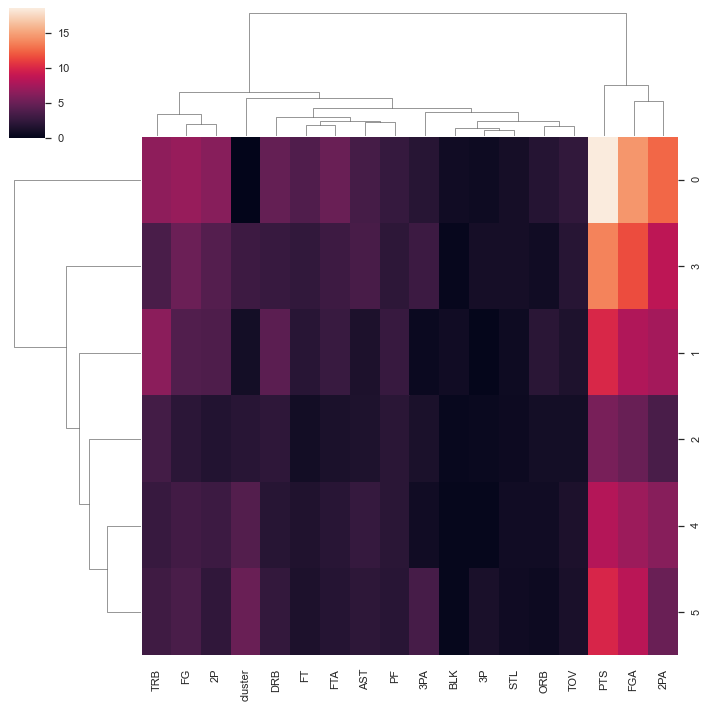

In [33]:
sns.clustermap(pad_group_df)
None

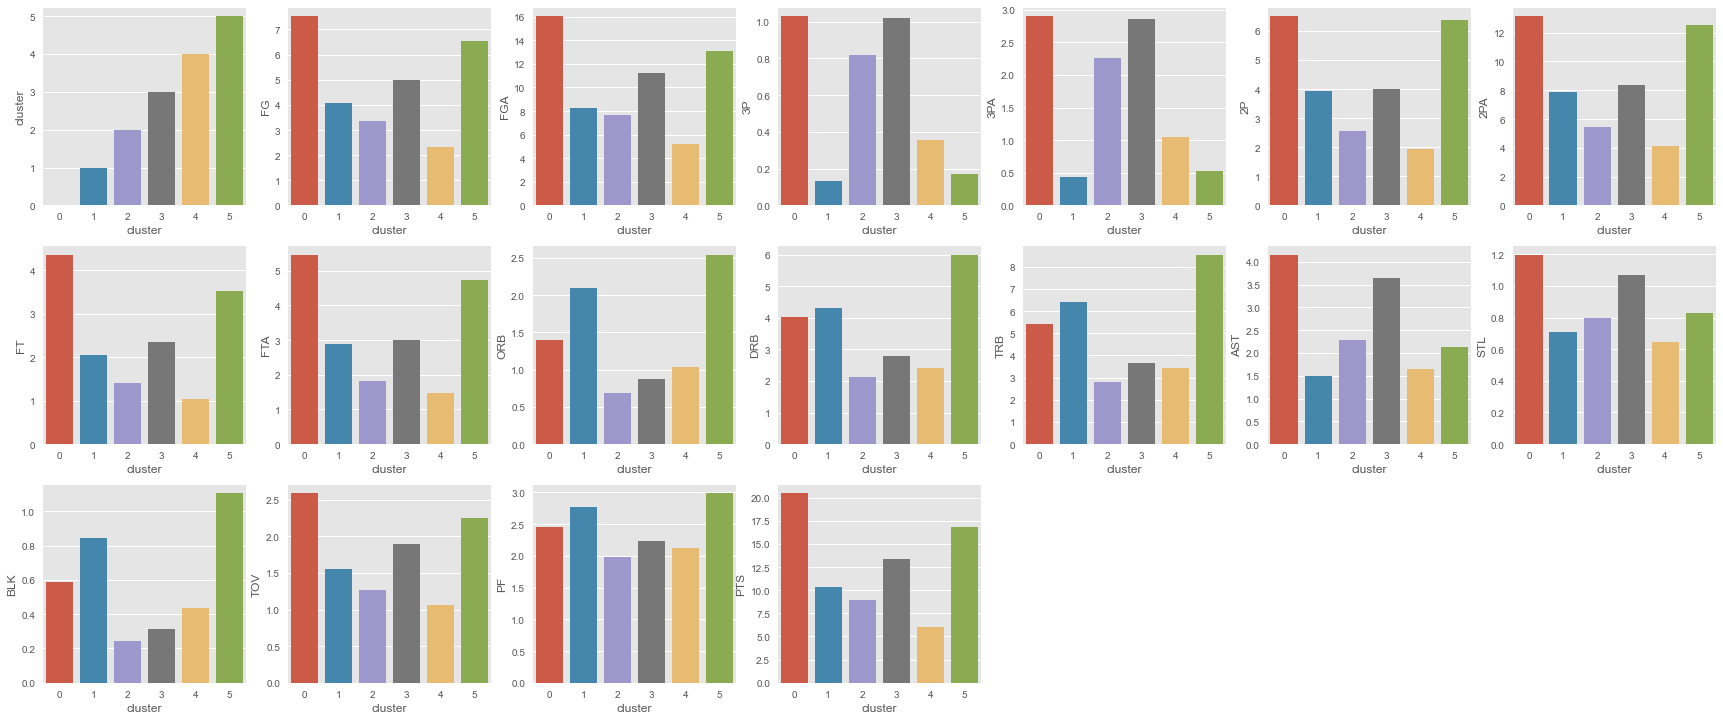

In [31]:
'''get column names'''
columns = list(pad_group_df)

'''plotting: barplot'''
plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(7, 7, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    sns.barplot(x = pad_group_df['cluster'], y = pad_group_df[column], ax=ax)

plt.show()

In [36]:
cluster_df.groupby('cluster').mean()

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
cluster,,,,,,,,,,,,,,,,,
0,6.978558,14.504814,0.662029,1.901302,6.316084,12.605173,3.899287,5.059132,1.836084,4.804167,6.638927,3.351794,1.044042,0.802131,2.431405,2.653523,18.520354
1,3.947093,8.068852,0.163082,0.526454,3.781617,7.539531,1.977313,2.814638,2.089174,4.382076,6.471784,1.441365,0.698133,0.836144,1.516928,2.743024,10.037164
2,2.157927,4.974297,0.457840,1.366440,1.698462,3.605572,0.926713,1.317537,0.966511,2.312673,3.274266,1.480538,0.617789,0.418840,0.979037,2.045703,5.697994
3,5.133233,11.581600,1.051608,2.945845,4.082152,8.634942,2.396965,3.014231,0.860416,2.705092,3.565191,3.496458,1.047071,0.297209,1.890762,2.199084,13.717852
4,3.207698,7.170859,0.257159,0.830566,2.950206,6.340970,1.530180,2.016498,0.818171,1.902283,2.716415,2.605804,0.827151,0.242593,1.418185,2.093161,8.200340
5,3.607712,8.465701,1.267896,3.460166,2.338698,5.005387,1.442900,1.843425,0.635286,2.467444,3.104301,2.202824,0.783171,0.278821,1.269535,2.008143,9.925304


In [37]:
K = range(1,10)
kmeans = [KMeans(n_clusters=k) for k in K]
score = [kmeans[k].fit(df_prescale).score(df_prescale) for k in range(len(kmeans))]

In [38]:
K = range(1,10)
kmeans = [KMeans(n_clusters=k) for k in K]
score = [kmeans[k].fit(X).score(X) for k in range(len(kmeans))]

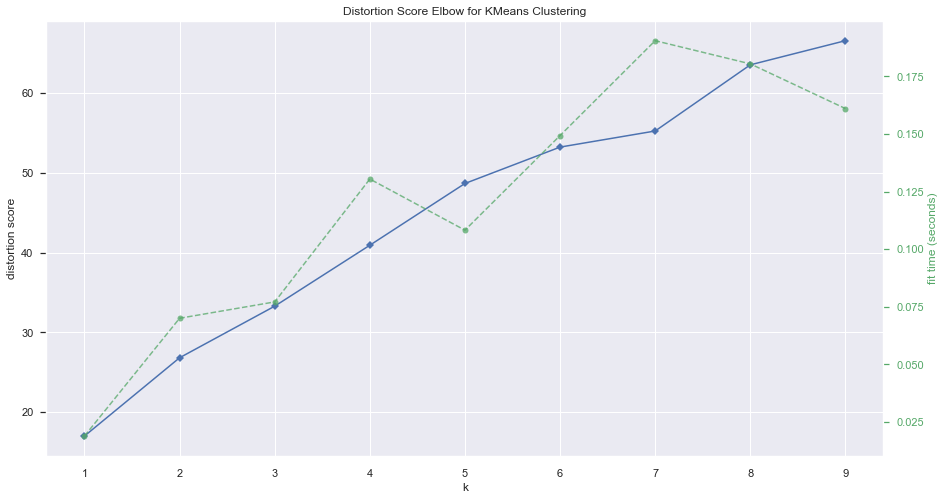

In [39]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

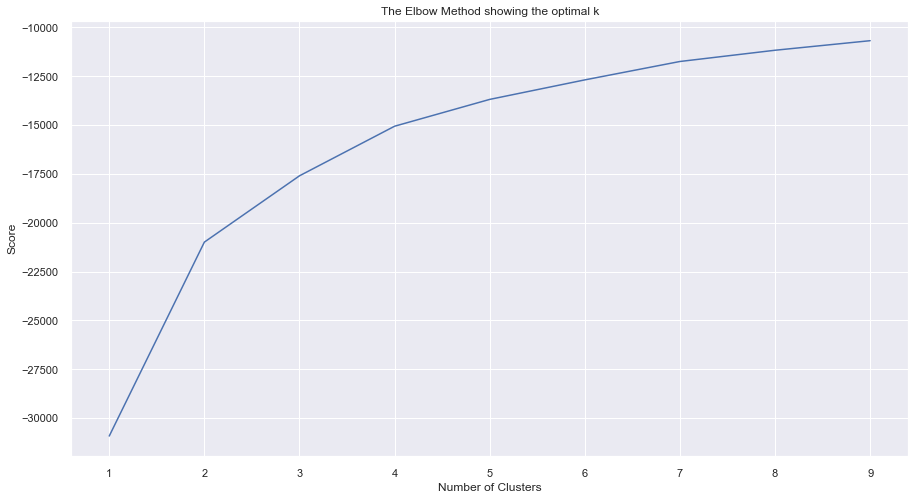

In [40]:
plt.plot(K, score, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

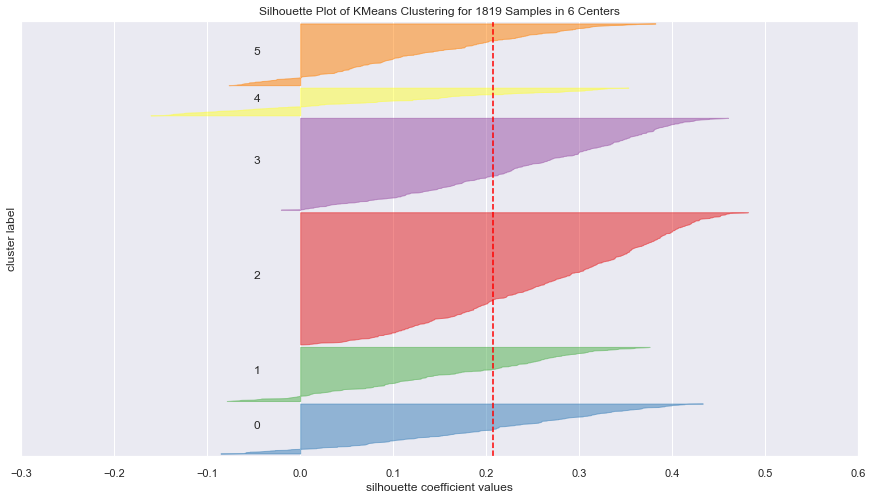

In [41]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()  

In [42]:
model = KMeans(
        n_clusters=6,
        init='k-means++',
        random_state=1)

model = model.fit(X)

y = model.predict(X)

In [43]:
pca_80 = PCA(n_components=3)

'''fit PCA on dataset.'''
principalComponents_80 = pca_80.fit_transform(df_prescale)

'''print number of components'''
print("n.comps:", pca_80.n_components_)

principal80_df = pd.DataFrame(data = principalComponents_80)

n.comps: 3


In [44]:
principal80_df.head()

,0,1,2
0,0.274199,4.184771,1.201554
1,1.182266,-1.034060,-3.364275
2,-6.688163,-2.717058,-0.693650
3,-5.120544,-3.278311,0.587186
4,0.474356,-4.316725,0.513678


In [45]:
'''create df out of y'''
y_df = pd.DataFrame(y)

'''rename y col'''
y_df.rename(columns = {0:"Cluster"}, inplace=True)

'''link back the predicted array to initial dataframe'''
pad_pca_df = pd.concat([principal80_df, y_df], axis=1)

In [46]:
pad_pca_df.rename(columns = {0 : "PCA1", 1: "PCA2", 2: "PCA3"}, inplace=True)

In [47]:
pad_pca_df

,PCA1,PCA2,PCA3,Cluster
0,0.274199,4.184771,1.201554,0
1,1.182266,-1.034060,-3.364275,5
2,-6.688163,-2.717058,-0.693650,3
3,-5.120544,-3.278311,0.587186,3
4,0.474356,-4.316725,0.513678,2
...,...,...,...,...
1814,-6.854865,-1.380030,0.004563,3
1815,2.535470,8.724389,3.731310,1
1816,-6.304165,-2.902497,0.291425,3
1817,3.053047,-1.787563,-1.611688,5


In [48]:
pad_pca_df.shape

(1819, 4)

In [59]:

'''select interesting cols'''
final_df = pd.merge(pad_pca_df, info, how = "inner", left_index=True, right_index=True)

In [55]:
final_df

,PCA1,PCA2,PCA3,Cluster,Player,Pos
3,-5.120544,-3.278311,0.587186,3,Tiny Archibald,PG
16,-6.219112,4.282114,0.887816,0,Henry Bibby,PG
17,-2.999054,2.739387,-0.499628,0,Larry Bird,PF
42,-3.122306,0.577425,-1.888076,5,M.L. Carr,SF
48,0.460785,-1.324686,0.316497,5,Maurice Cheeks,PG
...,...,...,...,...,...,...
1812,6.093107,4.049734,-0.210073,1,Terry Tyler,SF
1813,-9.073938,-2.874863,2.003924,3,Darnell Valentine,PG
1814,-6.854865,-1.380030,0.004563,3,Kiki Vandeweghe,SF
1816,-6.304165,-2.902497,0.291425,3,Jay Vincent,PF


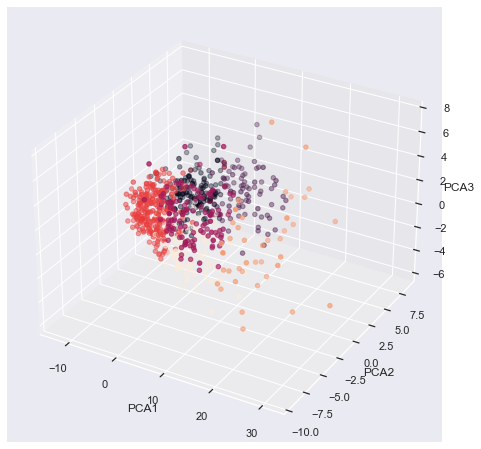

In [56]:
'''define top players'''
top_players = final_df.head(10)

'''3d plot - all data'''
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(final_df["PCA1"], final_df["PCA2"], final_df["PCA3"], c = final_df["Cluster"])

'''3d plot - top players'''
ax.scatter(top_players["PCA1"], top_players["PCA2"], top_players["PCA3"], c = "red")

'''label name'''
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")


plt.show()

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

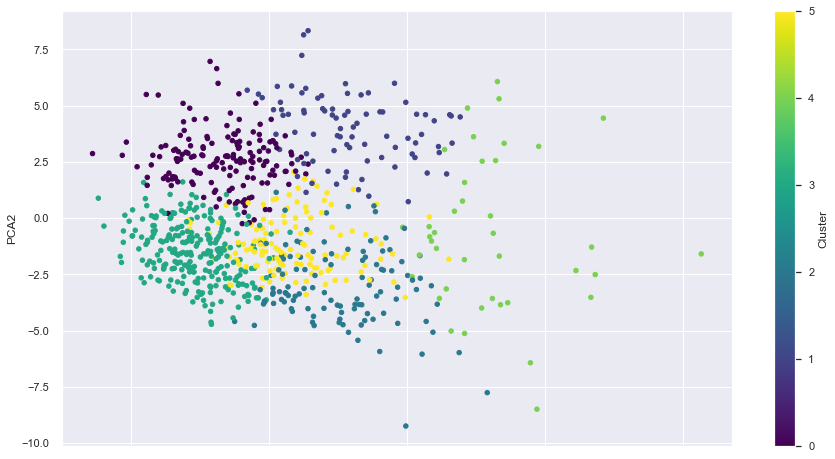

In [57]:
final_df.plot.scatter(x = 'PCA1',y = 'PCA2',  c = "Cluster", colormap='viridis')

In [58]:
'''merge orig.features with PCA'''
feat_pca_df = pd.merge(pad_df,principal80_df, left_index=True, right_index=True)

'''rename columns'''
feat_pca_df.rename(columns = {0 : "PCA1", 1: "PCA2", 2: "PCA3"}, inplace=True)

'''remove index and ID'''
feat_pca_df.drop(columns = ["ID"], inplace = True)

feat_pca_df.head(3)

NameError: name 'pad_df' is not defined

C:\Users\schek\anaconda3\envs\hyper\lib\site-packages\hypertools\plot\plot.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kwargs[kwarg]=np.array(kwargs[kwarg])


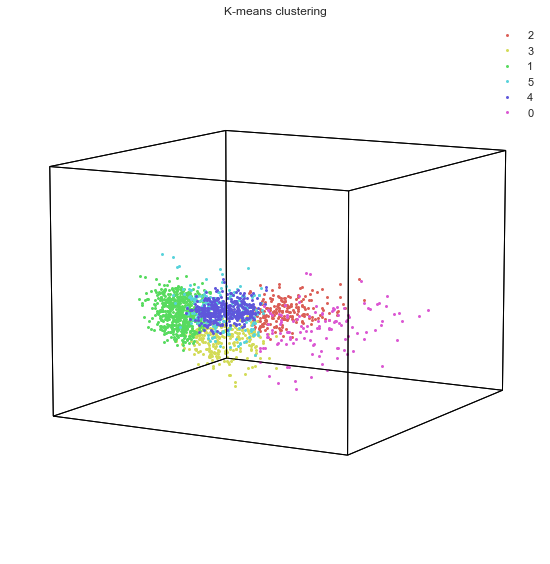

In [60]:
'''create labels for n clusters'''
labels_10 = hyp.cluster(X, n_clusters =6)
set(labels_10)

'''add labels'''
num_unlabeled = int(X.shape[0])-7
#labeling = ['Cristiano Ronaldo','L. Messi','Neymar', 'L. Suárez', 'M. Neuer'] + [None]*num_unlabeled + ["J. Lundstram", 'L. Sackey']

'''plot using hypertools'''
geo = hyp.plot(X, '.', hue=labels_10, title='K-means clustering', legend=True)